## Лабоораторная работа №3

### 1. Взял  набор данных по своему варианту для проведения анализа согласно цели выполняемой работы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
data = pd.read_csv('1heart.csv')
import sklearn
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


Мною был выбран первый вариант, где датасет содержит информацию о сердечных болезнях. При помощи data.head и data.info выведем инфорамицию о датасете и его содержании, проанализируем, и в случае каких-либо ошибок исправим. 

In [2]:
print(data)

     Age Sex ChestPainType  RestingBP Cholesterol  FastingBS RestingECG  \
0     40   M           ATA      140.0         289          0     Normal   
1     49   F           NAP      160.0         180          0     Normal   
2     37   M           ATA      130.0         283          0         ST   
3     48   F           ASY      138.0         214          0     Normal   
4     54   M           NAP      150.0         195          0     Normal   
..   ...  ..           ...        ...         ...        ...        ...   
920   38   M           NAP      138.0         175          0     Normal   
921   38   M           NAP      138.0         175          0        NaN   
922   57   F           ASY      140.0        a241          0     Normal   
923   55   F           ATA      132.0         342          0     Normal   
924   56  Ma           ATA      130.0         221          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172.0              N      0.0     

In [3]:
data.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0
5,39,M,NAP,120.0,339,0,Normal,170.0,N,0.0,Up,0
6,45,F,ATA,130.0,237,0,Normal,170.0,N,0.0,Up,0
7,54,M,ATA,110.0,208,0,Normal,142.0,N,0.0,Up,0
8,37,M,ASY,140.0,207,0,Normal,130.0,Y,1.5,Flat,1
9,48,F,ATA,120.0,284,0,Normal,120.0,N,0.0,Up,0


1. Возраст
2. Пол
3. Тип боли в груди (4 значения [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная])
4. Артериальное давление в покое
5. Холестерин сыворотки в мг/дл
6. Уровень сахара в крови натощак > 120 мг/дл
7. ЭКГ в покое: результаты электрокардиограммы в покое норма: нормальная, ST: аномалия ST-T LVN: гипертрофия
8. MaxHR: максимальная достигнутая частота сердечных сокращений [Числовое значение от 60 до 202]
9. Стенокардия, вызванная физической нагрузкой (да, нет)
10. oldpeak = депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя 
11. Наклон пикового сегмента ST при нагрузке (Вверх: восходящий, Плоский: плоский, Вниз: нисходящий)
12. HeartDisease: выходной класс [1: болезнь сердца, 0: нормальный] 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             925 non-null    int64  
 1   Sex             925 non-null    object 
 2   ChestPainType   925 non-null    object 
 3   RestingBP       923 non-null    float64
 4   Cholesterol     924 non-null    object 
 5   FastingBS       925 non-null    int64  
 6   RestingECG      924 non-null    object 
 7   MaxHR           924 non-null    float64
 8   ExerciseAngina  925 non-null    object 
 9   Oldpeak         925 non-null    float64
 10  ST_Slope        925 non-null    object 
 11  HeartDisease    925 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 86.8+ KB


Проанализировав типы данных столбцов и названия, мы можем прийти к выводу, что тип столбца Cholesterol можно поменять на int для дальнейшей работы с данными. 

### 2. Провести предварительную обработку данных (как в 1 ЛР).

Для начала выявим имеет ли датасет NaN значения в ячейках. 

In [5]:
print(data.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         2
Cholesterol       1
FastingBS         0
RestingECG        1
MaxHR             1
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Видим, что в столбцах RestingBP, Cholesterol, RestingECG, MaxHR имеют несколько значенй Nan. Менять пустые значения на нули я считаю нерационально, хоть и значений с нулями в столбцах по сравнению с обим количеством данных мало и вряд ли это повлияет на общую статстику, но все же я предпочту удалить данные строки с пустыми значениями в ячейках. 

In [6]:
data = data.dropna(subset=['RestingBP','Cholesterol','RestingECG','MaxHR',])

In [7]:
print(data.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Наглядно видим, что теперь в датасете осутствуют ячейки с пустыми значениями. Далле сменим тип стоблца Cholesterol на int и выведем datа.info, чтобы убедиться успешном изменении. 

In [8]:
data.replace(to_replace="a241",value= 241, inplace=True)

In [9]:
data['Cholesterol'] = data['Cholesterol'].astype(str).astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             921 non-null    int64  
 1   Sex             921 non-null    object 
 2   ChestPainType   921 non-null    object 
 3   RestingBP       921 non-null    float64
 4   Cholesterol     921 non-null    int32  
 5   FastingBS       921 non-null    int64  
 6   RestingECG      921 non-null    object 
 7   MaxHR           921 non-null    float64
 8   ExerciseAngina  921 non-null    object 
 9   Oldpeak         921 non-null    float64
 10  ST_Slope        921 non-null    object 
 11  HeartDisease    921 non-null    int64  
dtypes: float64(3), int32(1), int64(3), object(5)
memory usage: 89.9+ KB


Тип успешно был изменен и можно дальше обработать данные для правильного анализа данных датасета

In [11]:
print(data)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA      140.0          289          0     Normal   
1     49   F           NAP      160.0          180          0     Normal   
2     37   M           ATA      130.0          283          0         ST   
3     48   F           ASY      138.0          214          0     Normal   
4     54   M           NAP      150.0          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
918   38   M           NAP      138.0          175          0     Normal   
919   38   M           NAP      138.0          175          0     Normal   
920   38   M           NAP      138.0          175          0     Normal   
922   57   F           ASY      140.0          241          0     Normal   
924   56  Ma           ATA      130.0          221          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172.0              N  

Далее проверим датасет на наличие дубликатов.

In [12]:
print(data.duplicated().sum())

4


В датасете нашлось 4 дубликата, которые следует удалить 

In [13]:
data = data.drop_duplicates()
print(data.duplicated().sum())

0


Удаление дублкатов произошло успешно и наглядно видим, что количество дубликатов равно нулю.

________________________________________________________________________________________________________________________________________________

Проверим датасет на наличие неявных дубликатов.

In [14]:
print(data['Sex'].unique())

['M' 'F' 'Ma']


In [15]:
tableex = data.groupby(["Sex"])["Sex"].count()
print(tableex)

Sex
F     192
M     724
Ma      1
Name: Sex, dtype: int64


Долго сомневался нужно ли гендер Ма перенести в М, но в итоге решил именно так поступить.

In [16]:
data['Sex'] = data['Sex'].replace('Ma', 'M')

In [17]:
tableex = data.groupby(["Sex"])["Sex"].count()
print(tableex)

Sex
F    192
M    725
Name: Sex, dtype: int64


In [18]:
print(data['ChestPainType'].unique())

['ATA' 'NAP' 'ASY' 'TA']


In [19]:
print(data['RestingECG'].unique())

['Normal' 'ST' 'LVH']


In [20]:
tableex2 = data.groupby(["RestingECG"])["RestingECG"].count()
print(tableex2)

RestingECG
LVH       189
Normal    550
ST        178
Name: RestingECG, dtype: int64


In [21]:
print(data['ExerciseAngina'].unique())

['N' 'Y']


In [22]:
print(data['ST_Slope'].unique())

['Up' 'Flat' 'Down' 'UP']


In [23]:
tableex3 = data.groupby(["ST_Slope"])["ST_Slope"].count()
print(tableex3)

ST_Slope
Down     63
Flat    460
UP        1
Up      393
Name: ST_Slope, dtype: int64


Тут мы видим, что есть одно значение в ячейке, которое зааписано капсом и это нужно исправить.

In [24]:
data['ST_Slope'] = data['ST_Slope'].replace('UP', 'Up')

In [25]:
tableex3 = data.groupby(["ST_Slope"])["ST_Slope"].count()
print(tableex3)

ST_Slope
Down     63
Flat    460
Up      394
Name: ST_Slope, dtype: int64


Наглядно видноо, что замена значения произоша успешно и неявный дубликат устранен.

In [26]:
print(data['HeartDisease'].unique())

[0 1]


Больше неявных дубликатов в датасете не содержится и можно сделать вывод, что датасет готов к анализу и построению диаграмм.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     917 non-null    int32  
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    float64
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int64  
dtypes: float64(3), int32(1), int64(3), object(5)
memory usage: 89.6+ KB


Наглядно видим, что в датасете данные различных типов, а для кластеризации нам потребуются <br>
только количественного типа данные, поэтому для выполненения этой операции создадим дубликат <br>
датасета только из количественных данных



In [28]:
new_data = data.drop(data.columns[[1,2,6,8,10]], axis = 1)
new_data.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140.0,289,0,172.0,0.0,0
1,49,160.0,180,0,156.0,1.0,1
2,37,130.0,283,0,98.0,0.0,0
3,48,138.0,214,0,108.0,1.5,1
4,54,150.0,195,0,122.0,0.0,0


Видим, что новый датасет готов и можно приступить к кластеризации. 
Используя метод локтя вычислим отимальное количество кластеров для далнейшего анализа

In [29]:
from sklearn.cluster import kmeans_plusplus

aad = [] #Сумма квадратов ошибок  для каждого результата 

for k in range (1,10):
   est = KMeans (n_clusters = k) 
   est.fit(data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']])
   aad.append(est.inertia_)
print(aad)

[11963250.74246456, 3487193.570136032, 2052681.3227699932, 1595344.5162322174, 1339593.1201465456, 1168332.0053152596, 1048623.3512722186, 958149.0282812109, 885642.624180512]


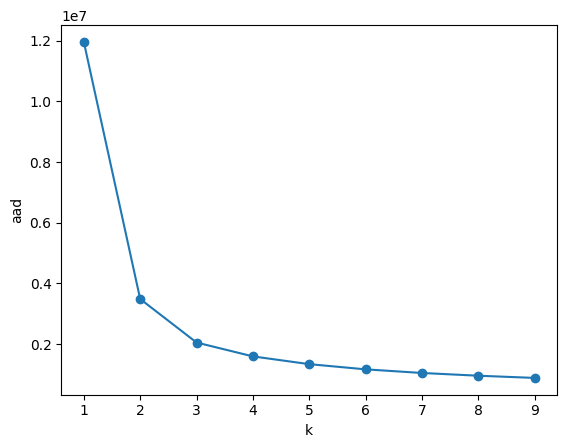

In [30]:
x = range(1,10)
plt.xlabel('k')
plt.ylabel('aad')
plt.plot(x,aad,'o-')

Реализуя наглядное отображение метода локтя, приходим к выводу, что наиболеее подходящим будет деление на 2 кластера (округлив 1.2 до 2)

## Кластеризация методом k-mean

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Создание объет класса scaler
scaler.fit(new_data) # Обучение стардандартизатора
X_sc = scaler.transform(new_data) # Преобразование набора данных 

Так как мы определили, что наилучшим решшением будет использовать 2 кластера

In [32]:
from sklearn.cluster import KMeans
# Стандартизация данных пере рабботой с алгоритмами 
sc = StandardScaler()
X_sc = sc.fit_transform(new_data)
km = KMeans(n_clusters=2, random_state=2) # Задали число кластеров (равное 2), которое определили на одном из предыдущих этапов 
                                          # и задаем занчение random_state = 2, чтобы в дальнейшем воспроизводить один и тот де результат 
labels = km.fit_predict(X_sc) # Применение алгоритма к данным и формирование вектора кластеров

In [33]:
data['k_means'] = km.labels_ + 1
d_pit = data.pivot_table(index='k_means', values=['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 
'HeartDisease'], aggfunc = 'mean').reset_index().sort_values('k_means')
d_pit

,k_means,Age,Cholesterol,FastingBS,HeartDisease,MaxHR,Oldpeak,RestingBP
0,1,49.351039,233.616628,0.083141,0.110855,150.579677,0.321940,128.722864
1,2,57.287190,167.659091,0.367769,0.950413,124.483471,1.395041,135.708678


In [34]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,k_means
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0,1
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1,2
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0,1
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1,2
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,68,M,ASY,144.0,193,1,Normal,141.0,N,3.4,Flat,1,2
915,57,M,ASY,130.0,131,0,Normal,115.0,Y,1.2,Flat,1,2
916,57,F,ATA,130.0,236,0,LVH,174.0,N,0.0,Flat,1,1
917,38,M,NAP,138.0,175,0,Normal,173.0,N,0.0,Up,0,1


Исходя их полученных данных можно сделать вывод, что наиболее важными параметрами для определение наличия болезней сердца у человека являются: возраст (Age), максимальная достигнутая частота сердечных сокращений (MaxHR) и депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя (Oldpeak) и уровень холестерина (Cholesterol)

## Агломеративная иерархическая кластеризация

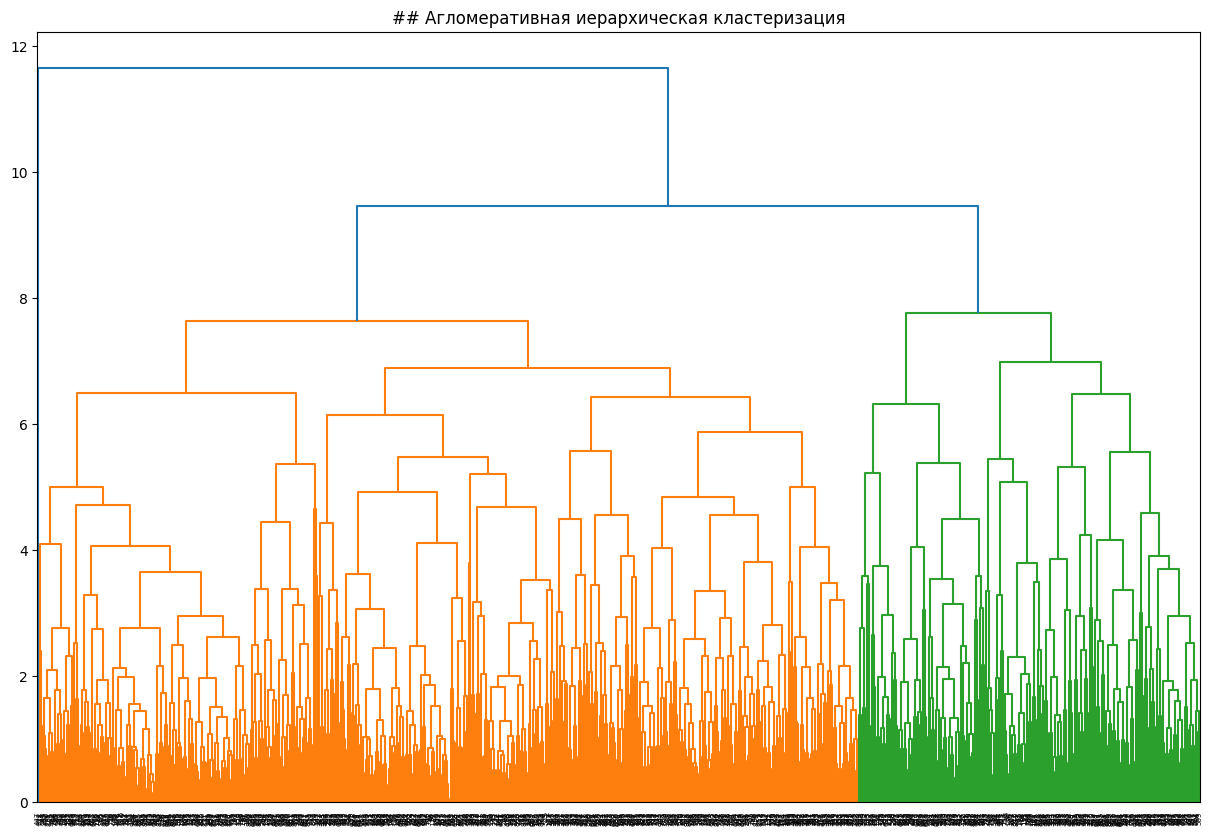

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
sc = StandardScaler()
X_sc = sc.fit_transform(new_data)
linked = linkage(X_sc, method='complete', metric='seuclidean')
plt.figure(figsize=(15,10))
dendrogram(linked)
plt.title('## Агломеративная иерархическая кластеризация')
plt.show()

# Вывод

В ходе данной лабораторной работы были приобретены полезные изучению алгоритмов и методов кластерного анализа на практике. В процессе выполнения работы иерархический императивный метод показался наглядно удобнее, чам метод k-средних благодаря его визуализации в виде дерева склеивания кластеров. Таким образом визульно легко определить какой этап для остановки алгоритма будет наиболее оптимальным, чтобы вычислить оптимальное количество кластеров. После анализа полученных результатов можно сделать вывод, что люди, средний возраст которых начинается с 56-58 лет наиболее подвержены болезням сердца, подтверждаются выводы предыдущего анализа, что более низкая максимальная частота сердечных сокращений. 